# Rainfall vs beef production chart

In [3]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
# rcParams.update({'figure.autolayout': True})
plt.rcParams['figure.figsize'] = [18, 8] #gives compact size to plots
%matplotlib inline


In [12]:
df = pd.read_excel('sidwell.xls')
df['rainfall']= df['rainfall'].shift(2) #this will yield rainfall from 2 years prior
df['lbsperinch'] = df.totalproduction/df.rainfall
df = df[5:][['year','rainfall','totalproduction','lbsperinch']]
df.set_index('year',drop=True, inplace=True)
df

,rainfall,totalproduction,lbsperinch
year,,,
2010,18.20,72800.0,4000.000000
2011,11.40,44065.0,3865.350877
2012,18.35,73840.0,4023.978202
2013,6.02,26835.0,4457.641196
2014,7.55,42045.0,5568.874172
2015,10.85,49365.0,4549.769585
2016,11.63,63140.0,5429.062769
2017,20.55,71150.0,3462.287105
2018,12.84,75201.0,5856.775701


Text(0.5, 1.0, 'JX Ranch: Rainfall vs beef production')

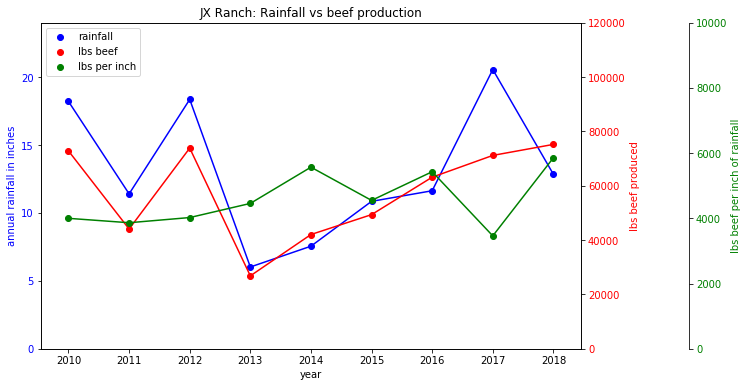

In [13]:
#chart with 3 y axes
def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)

y1 = list(df['rainfall'])
y2 = list(df['totalproduction'])
y3 = list(df['lbsperinch'])
x = list(df.index)

fig, host = plt.subplots(figsize=(12,6))
fig.subplots_adjust(right=0.75)

par1 = host.twinx()
par2 = host.twinx()

# Offset the right spine of par2.  The ticks and label have already been
# placed on the right by twinx above.
par2.spines["right"].set_position(("axes", 1.2))
# Having been created by twinx, par2 has its frame off, so the line of its
# detached spine is invisible.  First, activate the frame but make the patch
# and spines invisible.
make_patch_spines_invisible(par2)
# Second, show the right spine.
par2.spines["right"].set_visible(True)

p1, = host.plot(x, y1, "b-", label="rainfall")
p1 = host.scatter(x, y1, c="b")

p2, = par1.plot(x, y2, "r-", label="lbs beef")
p2 = par1.scatter(x, y2, c="r")

p3, = par2.plot(x, y3, "g-", label="lbs per inch")
p3 = par2.scatter(x, y3, c="g")

# host.set_xlim(0, 2)
host.set_ylim(0, 24)
par1.set_ylim(0, 120000)
par2.set_ylim(0, 10000)

host.set_xlabel("year")
host.set_ylabel("annual rainfall in inches")
par1.set_ylabel("lbs beef produced")
par2.set_ylabel("lbs beef per inch of rainfall")

for tl in host.get_yticklabels():
    tl.set_color('b')
for tl in par1.get_yticklabels():
    tl.set_color('r')
for tl in par2.get_yticklabels():
    tl.set_color('g')
host.yaxis.label.set_color('b')
par1.yaxis.label.set_color('r')
par2.yaxis.label.set_color('g')

host.legend((p1,p2,p3), ('rainfall', 'lbs beef', 'lbs per inch'))
plt.title('JX Ranch: Rainfall vs beef production')

# plt.savefig('JXrancha.png',bbox_inches='tight')

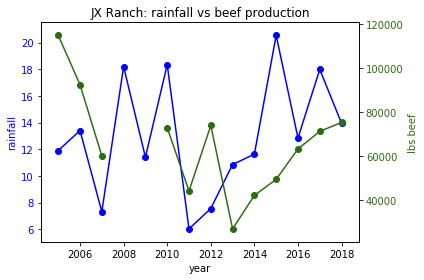

In [48]:
#chart with two y axes
y1 = list(df['rainfall'])
y2 = list(df['totalproduction'])
x = list(df.index)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.set_xlabel('year')
color = 'b'
ax1.set_ylabel('annual rainfall in inches', color=color)
ax1.plot(x,y1, c=color)
ax1.scatter(x,y1, c=color)
ax1.set_ylabel('rainfall')
for tl in ax1.get_yticklabels():
    tl.set_color(color)

color = '#2d6d12'
ax2.set_ylabel('lbs beef', color=color)
ax2.plot(x, y2, c=color)
ax2.set_ylabel('lbs beef')
ax2.scatter(x, y2, c=color)
for tl in ax2.get_yticklabels():
    tl.set_color(color)
plt.title('JX Ranch: rainfall vs beef production')
lines = [y1, y2]

# ax1.legend(lines, [l.get_label() for l in lines])

# plt.savefig('JXranch.png',bbox_inches='tight')